### Individual ACS Data

[Documentation](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2015-2019.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from data_pipeline import fetch_census_data

In [3]:
#fetch_census_data.acs5_individual(force_api_call=True)

In [4]:
# loading individual acs data

acs_ind=pd.read_csv("data/acs5_individual.csv").drop(
                        ['Unnamed: 0', 'state'], axis=1)

In [5]:
# get rid of 0
acs_ind.internet_access.unique()

array([1, 3, 0, 2])

In [6]:
# get rid of those who did not respond to internet access question
acs_ind = acs_ind[acs_ind['internet_access'] >0]

In [7]:
# recoding internet access
# 0 = no access
# 1 = access 

acs_ind.loc[(acs_ind.internet_access == 2),'internet_access']=1
acs_ind.loc[(acs_ind.internet_access == 3),'internet_access']=0

In [8]:
# recoding hispanic
# 0 = not hispanic
# 1 = hispanic

acs_ind.loc[(acs_ind.hispanic == 1),'hispanic']=0
acs_ind.loc[(acs_ind.hispanic > 1),'hispanic']=1

In [9]:
acs_ind.family_income.unique()

array([ -60000,  366000,  385000, ...,  211900, 1033000,  315300])

In [10]:
acs_ind.hh_income.unique()

array([   1000,   96000,  366000, ..., 1033000,  315300,   68380])

In [11]:
# keeping incomes above 0 

acs_ind1 = acs_ind[acs_ind['hh_income'] >0]
acs_ind1 = acs_ind[acs_ind['family_income'] >0]

In [12]:
# log incomes

acs_ind1["log_family_income"]=acs_ind1["family_income"].apply(lambda x: np.log(x))
acs_ind1["log_hh_income"]=acs_ind1["hh_income"].apply(lambda x: np.log(x))

/var/folders/yh/k_65n3ts3434_qy657hn5pmw0000gn/T/ipykernel_86580/758154451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_ind1["log_family_income"]=acs_ind1["family_income"].apply(lambda x: np.log(x))
/var/folders/yh/k_65n3ts3434_qy657hn5pmw0000gn/T/ipykernel_86580/758154451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_ind1["log_hh_income"]=acs_ind1["hh_income"].apply(lambda x: np.log(x))


In [13]:
acs_ind1

,internet_access,internet_access_af,broadband,broadband_af,family_income,family_income_af,hh_income,hh_income_af,poverty,race,race_af,hispanic,hispanic_af,pop_sixty,weight,public use microdata area,log_family_income,log_hh_income
2,1,0,1,0,366000,0,366000,0,501,1,0,0,0,0,15,3420,12.810389,12.810389
3,1,0,1,0,366000,0,366000,0,501,6,0,0,0,0,13,3420,12.810389,12.810389
4,1,0,1,0,366000,0,366000,0,501,9,0,0,0,0,14,3420,12.810389,12.810389
5,1,0,1,0,366000,0,366000,0,501,9,0,0,0,0,12,3420,12.810389,12.810389
6,1,0,1,0,385000,0,385000,0,501,1,0,0,0,0,16,3502,12.860999,12.860999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119892,1,0,1,0,79000,1,79000,1,395,1,0,0,0,2,9,3530,11.277203,11.277203
119893,1,0,1,0,79000,1,79000,1,395,1,0,0,0,2,9,3530,11.277203,11.277203
119894,1,0,1,0,79000,1,79000,1,395,1,0,0,0,2,11,3530,11.277203,11.277203
119895,0,0,0,0,2900,1,2900,1,18,1,0,0,0,2,13,3504,7.972466,7.972466


#### Visualizations

<AxesSubplot:xlabel='internet_access', ylabel='log_hh_income'>

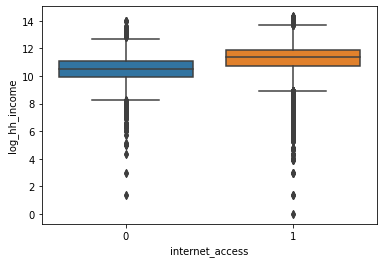

In [14]:

sns.boxplot(x="internet_access", y="log_hh_income", data=acs_ind1)

<AxesSubplot:xlabel='internet_access', ylabel='log_family_income'>

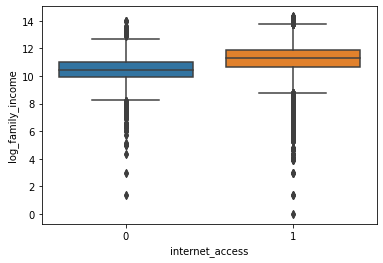

In [15]:
sns.boxplot(x="internet_access", y="log_family_income", data=acs_ind1)

In [16]:
count_no_int = len(acs_ind[acs_ind['internet_access']==0])
count_int = len(acs_ind[acs_ind['internet_access']==1])
pct_of_int = count_int/(count_no_int+count_int)
print("percentage with internet access is", pct_of_int*100)
pct_of_no_int = count_no_int/(count_no_int+count_int)
print("percentage with no internet access", pct_of_no_int*100)

percentage with internet access is 89.49815910240974
percentage with no internet access 10.501840897590256


### List of variables that may impact internet access

- household income
- family income
- race
- hispanic
- poverty to income ratio 

### Correlation 

<AxesSubplot:>

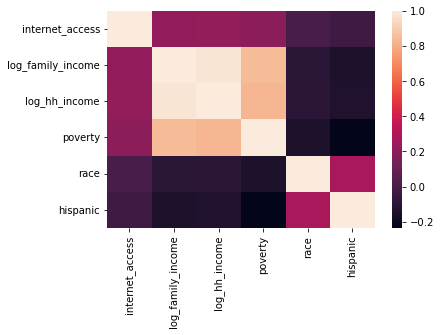

In [17]:
sns.heatmap(
    acs_ind1[['internet_access','log_family_income','log_hh_income','poverty','race','hispanic']]
    .corr()
)

#### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit

In [19]:
formula=("internet_access ~ log_hh_income + log_family_income + hispanic + race + poverty")

model=logit(formula=formula, data=acs_ind1).fit()

Optimization terminated successfully.
         Current function value: 0.259272
         Iterations 7


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85186
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                 0.07981
Time:                        17:41:11   Log-Likelihood:                -22088.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9329      0.183    -16.014      0.000      -3.292      -2.574
log_hh_income         0.5704      0.060      9.486      0.000       0.453       0.688
log_family_income    -0.1309      0.061     -2.135      0.033      -0.251      -0.011
hispanic             -0.1325      0.029     -4.636      0.000      -0.188      -0.076
race                  0.0410      0.005      7.602      0.000       0.030       0.052
poverty               0.0018      0.000     12.854      0.000       0.002       0.002
=====================================================================================
"""

Each one-unit change in log household income will increase the log odds of having internet access by 0.57, and its p-value indicates that it is significant.

Each one-unit change in log family income will decrease the log odds of having internet access by 0.13, and its p-value indicates that it is significant. This doesn't make a lot of sense

Each one-unit change in hispanic will decrease the log odds of having internet access by 0.13, and its p-value indicates that it is significant.

The way race is coded right now, the results don't say much about it. 

